# VI y MC Dropout para clasificación de imágenes
***
Ejemplo obtenido de: https://github.com/tensorchiefs/dl_book/blob/master/chapter_08/nb_ch08_04.ipynb

## Instalación de Tensorflow Probability

In [1]:
pip install tensorflow_probability

## Bibliotecas de Python

In [2]:
import tensorflow as tf
import tensorflow_probability as tpf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import urllib.request
from sklearn.model_selection import train_test_split
import tensorflow_probability as tfp

%matplotlib inline
plt.style.use('default')

print("TFP Version", tfp.__version__)
print("TF  Version",tf.__version__)


TFP Version 0.22.0
TF  Version 2.14.0


In [3]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

## Obtención de datos CIFAR

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


## Ejemplos de clases CIFAR

<ipython-input-5-bf2d1e06132e>:10: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title(np.str(y_train[rmd][0][0])+ ": " +labels[i],fontsize=16)


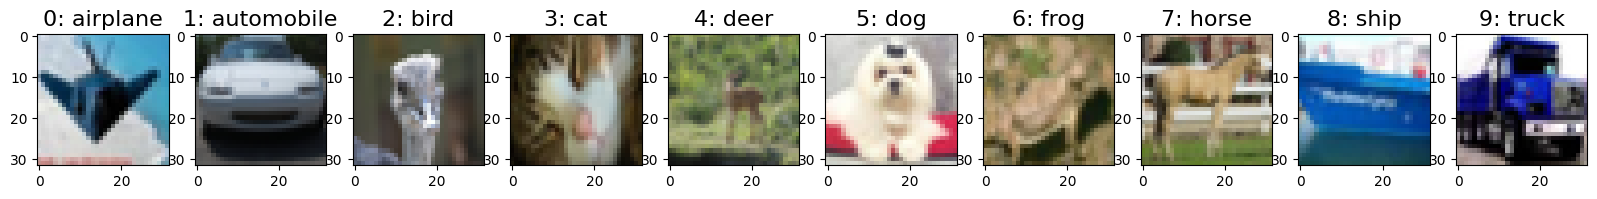

In [5]:
labels=np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])
#sample image of each label
np.random.seed(22)
plt.figure(figsize=(20,20))
for i in range(0,len(np.unique(y_train))):
    rmd=np.random.choice(np.where(y_train==i)[0],1)
    plt.subplot(1,10,i+1)
    img=x_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(np.str(y_train[rmd][0][0])+ ": " +labels[i],fontsize=16)

## Eliminación de clases 7 (horse)
***
Se elimina esta clase para evaluar comportamiento al predecir un dato que no forma parte del conjunto de entrenamiento

In [6]:
y_train_no_horse=np.delete(y_train,np.where(y_train==7)[0])
x_train_no_horse=np.delete(x_train,np.where(y_train==7)[0],axis=0)
print(y_train_no_horse.shape)
print(x_train_no_horse.shape)
y_train_no_horse=np.array(pd.get_dummies(y_train_no_horse))
labels_no_horse=np.array(["airplane","automobile","bird","cat","deer","dog","frog","ship","truck"])
print(y_train_no_horse.shape)

(45000,)
(45000, 32, 32, 3)
(45000, 9)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_no_horse, y_train_no_horse, test_size=0.4, random_state=22)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

#Before training the NNs with the data, we normalize the data to be in the range between -1 and 1.
x_train=((x_train/255)-0.5)*2
x_val=((x_val/255)-0.5)*2
x_test=((x_test/255)-0.5)*2

x_test.min(), x_test.max()

(27000, 32, 32, 3)
(27000, 9)
(18000, 32, 32, 3)
(18000, 9)
(10000, 32, 32, 3)
(10000, 1)


(-1.0, 1.0)

## Red no Bayesiana

In [8]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras import Sequential

model = Sequential()
model.add(Convolution2D(8,kernel_size=(3,3),padding="same", activation = 'relu',input_shape=(32,32,3)))
model.add(Convolution2D(8,kernel_size=(3,3),padding="same", activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(16,kernel_size=(3,3),padding="same", activation = 'relu'))
model.add(Convolution2D(16,kernel_size=(3,3),padding="same", activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout((0.5)))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout((0.5)))
model.add(Dense(9, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 8)         0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                   

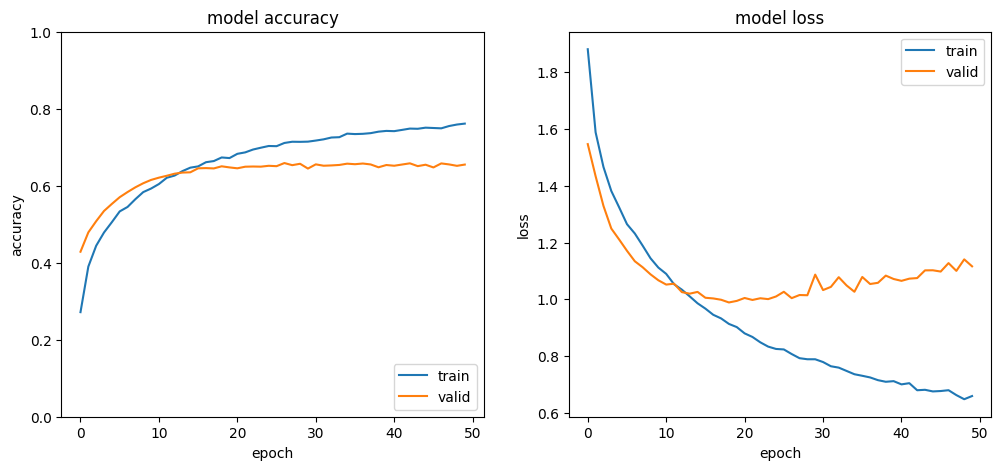

In [9]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/data/history_baseline_cifar10.csv", "history_baseline_cifar10.csv")
history=np.loadtxt("history_baseline_cifar10.csv",delimiter=",")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history[:,0])
plt.plot(history[:,1])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history[:,2])
plt.plot(history[:,3])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [10]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/data/model_cifar10_weights.hdf5", "model_cifar10_weights.hdf5")
model.load_weights("model_cifar10_weights.hdf5")

## Variational Inference

In [11]:
kernel_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (x_train.shape[0] *1.0)

model_vi = Sequential()
model_vi.add(tfp.layers.Convolution2DFlipout(8,kernel_size=(3,3),padding="same", activation = 'relu', kernel_divergence_fn=kernel_divergence_fn,input_shape=(32,32,3)))
model_vi.add(tfp.layers.Convolution2DFlipout(8,kernel_size=(3,3),padding="same", activation = 'relu', kernel_divergence_fn=kernel_divergence_fn))
model_vi.add(tf.keras.layers.MaxPooling2D((2,2)))
model_vi.add(tfp.layers.Convolution2DFlipout(16,kernel_size=(3,3),padding="same", activation = 'relu', kernel_divergence_fn=kernel_divergence_fn))
model_vi.add(tfp.layers.Convolution2DFlipout(16,kernel_size=(3,3),padding="same", activation = 'relu', kernel_divergence_fn=kernel_divergence_fn))
model_vi.add(tf.keras.layers.MaxPooling2D((2,2)))
model_vi.add(tf.keras.layers.Flatten())
model_vi.add(tfp.layers.DenseFlipout(100, activation = 'relu', kernel_divergence_fn=kernel_divergence_fn))
model_vi.add(tfp.layers.DenseFlipout(100, activation = 'relu', kernel_divergence_fn=kernel_divergence_fn))
model_vi.add(tfp.layers.DenseFlipout(9, activation = 'softmax', kernel_divergence_fn=kernel_divergence_fn))

model_vi.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_vi.summary()

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:108: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_flipout (Conv2DFlip  (None, 32, 32, 8)         440       
 out)                                                            
                                                                 
 conv2d_flipout_1 (Conv2DFl  (None, 32, 32, 8)         1160      
 ipout)                                                          
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_flipout_2 (Conv2DFl  (None, 16, 16, 16)        2320      
 ipout)                                                          
                                                                 
 conv2d_flipout_3 (Conv2DFl  (None, 16, 16, 16)       

## Different predictions for the same image

In [35]:
for i in range(0,5):
  print(model_vi.predict(x_train[0:1])[0])

[0.03249266 0.0004458  0.18785512 0.28992575 0.18114921 0.3001401
 0.00541166 0.00192898 0.00065061]
[3.3872710e-03 1.1205312e-04 7.0317030e-02 5.9606677e-01 1.9006324e-01
 1.3189082e-01 7.7923988e-03 1.5512723e-04 2.1533524e-04]
[1.2795208e-03 1.1728946e-04 3.9043125e-02 3.4771979e-01 1.5597232e-01
 4.5106450e-01 4.5179720e-03 1.2681156e-04 1.5859354e-04]
[7.5061941e-03 2.6341880e-04 1.6350779e-01 2.4247223e-01 4.3031603e-01
 1.3072398e-01 2.3807101e-02 8.1570429e-04 5.8771501e-04]
[1.0880988e-02 2.5577217e-04 1.1022662e-01 1.8335015e-01 5.8380049e-01
 1.0055362e-01 9.4132060e-03 1.1374740e-03 3.8170742e-04]


In [13]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/data/vi_128_lrdefault.hdf5", "vi_128_lrdefault.hdf5")
model_vi.load_weights("vi_128_lrdefault.hdf5")

# download the history
import pickle
urllib.request.urlretrieve("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/data/model_vi_bs_128_lrdefault_hist.pickle", "model_vi_bs_128_lrdefault_hist.pickle")
with open('model_vi_bs_128_lrdefault_hist.pickle', 'rb') as f:
    history = pickle.load(f)

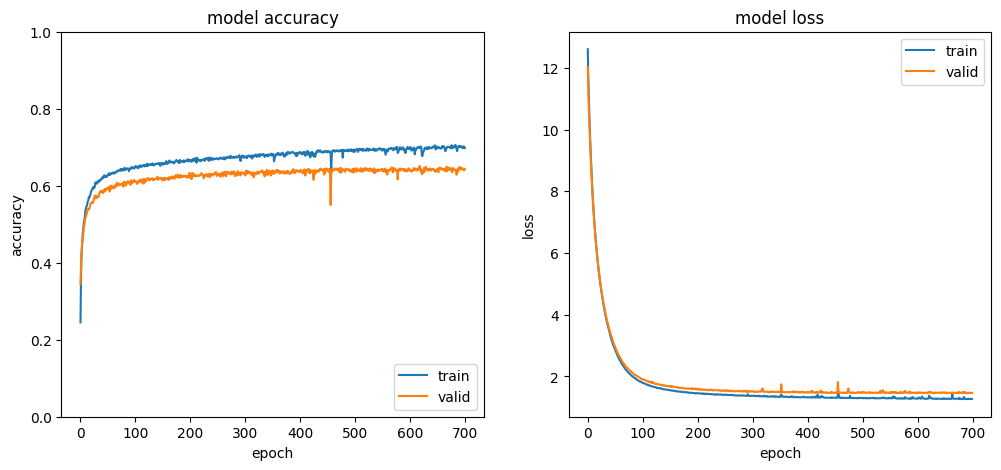

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
#plt.plot(history[:,0])
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
# plt.plot(history[:,2])
# plt.plot(history[:,3])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.savefig('lr.pdf')

## MC Dropout

In [15]:
model_mc = Sequential()
model_mc.add(Convolution2D(8,kernel_size=(3,3),padding="same", activation = 'relu',input_shape=(32,32,3)))
model_mc.add(Dropout((0.3)))
model_mc.add(Convolution2D(8,kernel_size=(3,3),padding="same", activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(MaxPooling2D((2,2)))
model_mc.add(Convolution2D(16,kernel_size=(3,3),padding="same", activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(Convolution2D(16,kernel_size=(3,3),padding="same", activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(MaxPooling2D((2,2)))
model_mc.add(Flatten())
model_mc.add(Dense(100, activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(Dense(100, activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(Dense(9, activation = 'softmax'))

model_mc.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model_mc.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 8)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 8)         0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 16)        1168      
                                                      

## Dropout durante entrenamiento e inferencia
***
 K.learning_phase() = 1

 * También, se puede usar:
 import keras


```
inputs = keras.Input(shape=(10,))
x = keras.layers.Dense(3)(inputs)
outputs = keras.layers.Dropout(0.5)(x, training=True)

model = keras.Model(inputs, outputs)
```
Check [here](https://github.com/keras-team/keras/issues/9412)


In [16]:
import tensorflow.keras.backend as K
model_mc_pred = K.function([model_mc.input, K.learning_phase()], [model_mc.output])

## Diferentes predicciones para la misma imagen

In [17]:
for i in range(0,5):
  print(model_mc_pred([x_train[0:1],1])[0])

[[0.12158789 0.19230671 0.06439987 0.03967952 0.04380109 0.05074724
  0.0272622  0.14816153 0.31205395]]
[[0.1648843  0.2661993  0.0622432  0.0801909  0.0093155  0.02536327
  0.06834397 0.0114489  0.3120107 ]]
[[0.09042993 0.24716832 0.2779345  0.04851346 0.03074602 0.05920684
  0.13300312 0.04458734 0.06841047]]
[[0.04595714 0.40743023 0.03899362 0.16661125 0.02593291 0.02375782
  0.03492695 0.01985375 0.23653635]]
[[0.11241118 0.51346225 0.02893843 0.05779313 0.03009144 0.10987408
  0.01745408 0.06475746 0.06521802]]


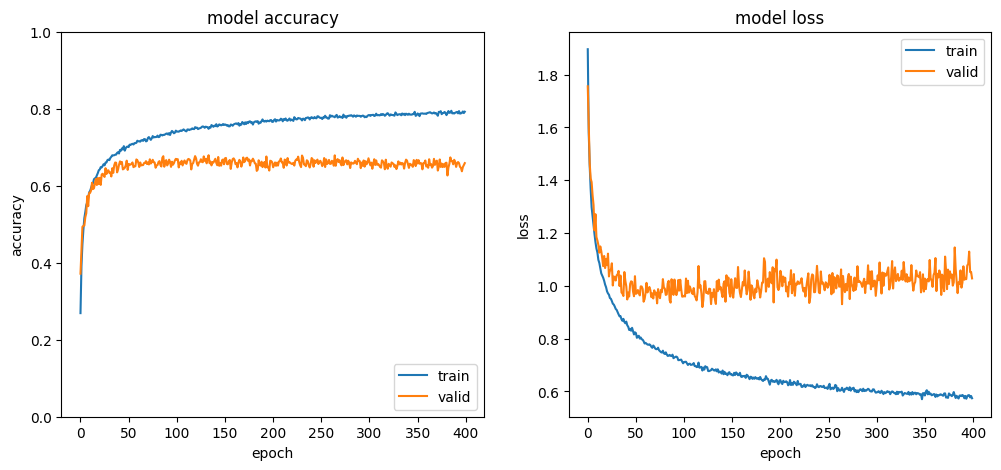

In [18]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/data/history_mc_cifar10.csv", "history_mc_cifar10.csv")
history=np.loadtxt("history_mc_cifar10.csv",delimiter=",")
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history[:,0])
plt.plot(history[:,1])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history[:,2])
plt.plot(history[:,3])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [19]:
# download and load weights of the model
urllib.request.urlretrieve("https://raw.githubusercontent.com/tensorchiefs/dl_book/master/data/model_mc_cifar10_weights.hdf5", "model_mc_cifar10_weights.hdf5")
model_mc.load_weights("model_mc_cifar10_weights.hdf5")

## Desempeño de los modelos e incertidumbre de las predicciones
* Desempeño de la clasificación: accuracy
* Estimación de incertidumbre: NNL, entropía y varianza total

### Caso no Bayesiano

In [20]:
known_idx=np.where(y_test!=7)[0]
unknown_idx=np.where(y_test==7)[0]

print(len(known_idx))
print(len(unknown_idx))

9000
1000


In [67]:
pred=model.predict(x_test) # matriz de 10000x9 (son 10 datos de testing)
pred_max_p=np.max(pred,axis=1) # obteniendo la clasificación según la mayor "probabilidad"
# Entropía
# H_{imagen} = - \sum_{k=1}^{9} pred_k^*  log(pred_k_^*)
entropy=np.array([-np.sum( pred[i] * np.log2(pred[i] + 1E-14)) for i in range(0,len(pred))]) # a cada imagen le calcula la entropía
print("entropy", entropy)
# Negative log likelihood
nll_=-np.log(pred_max_p)
pred_labels=np.array([labels_no_horse[np.argmax(pred[i])] for i in range(0,len(pred))])
true_labels=np.array([labels[y_test[i][0]] for i in range(0,len(y_test))])

entropy [1.1475267  0.8328413  1.9012357  ... 0.93466204 2.4331844  2.4199002 ]


**Accuracy red no Bayesiana**

In [22]:
test_acc_all=np.average(true_labels==pred_labels)
test_acc_known=np.average(true_labels[known_idx]==pred_labels[known_idx])
test_acc_all, test_acc_known

(0.5845, 0.6494444444444445)

### Caso VI
***
T = 50

In [82]:
pred_vi=np.zeros((len(x_test),9))
pred_max_p_vi=np.zeros((len(x_test)))
pred_std_vi=np.zeros((len(x_test)))
entropy_vi = np.zeros((len(x_test)))
T_preds_vi = np.zeros((50,9,len(x_test)))

for i in tqdm(range(0,len(x_test))):
  multi_img=np.tile(x_test[i],(50,1,1,1)) # arreglo con 50 imagenes repetidas --> T=50
  preds=model_vi.predict(multi_img)
  T_preds_vi[:,:,i] = preds
  pred_vi[i]=np.mean(preds,axis=0)#mean over n runs of every proba class
  pred_max_p_vi[i]=np.argmax(np.mean(preds,axis=0))#mean over n runs of every proba class
  # varianza total
  pred_std_vi[i]= np.sqrt(np.sum(np.var(preds, axis=0)))
  # entropía
  entropy_vi[i] = -np.sum( pred_vi[i] * np.log2(pred_vi[i] + 1E-14)) #Numerical Stability
pred_labels_vi=np.array([labels_no_horse[np.argmax(pred_vi[i])] for i in range(0,len(pred_vi))])
pred_vi_mean_max_p=np.array([pred_vi[i][np.argmax(pred_vi[i])] for i in range(0,len(pred_vi))])
# NNL
nll_vi=-np.log(pred_vi_mean_max_p)

<ipython-input-82-a10fe95bcf5e>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0,len(x_test))):


  0%|          | 0/10000 [00:00<?, ?it/s]

### Visualicemos las distribuciones predictivas de un dato específico

In [109]:
preds.shape,pred_vi.shape,pred_max_p_vi.shape, T_preds_vi.shape

((50, 9), (10000, 9), (10000,), (50, 9, 10000))

In [85]:
T_preds_vi[:,:,0].shape

(50, 9)

In [99]:
print(y_test.shape)
print(pred_vi[0])

(10000, 1)
[0.00894449 0.00737361 0.01848377 0.41434804 0.01059304 0.24438965
 0.07189862 0.09099779 0.13297099]


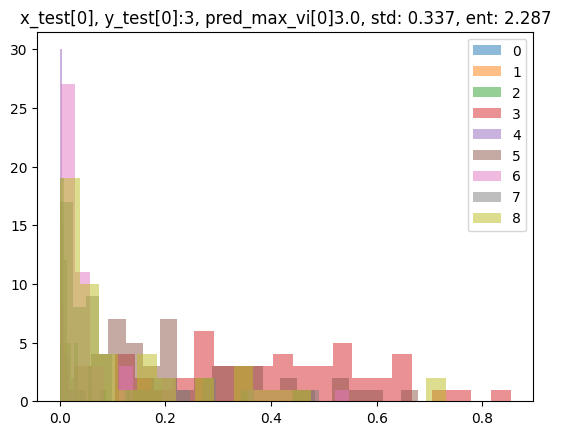

In [121]:
plt.figure()
for ind in range(9):
  plt.hist(T_preds_vi[:,ind,0],bins=20,label=str(ind), alpha=0.5)
current_std = round(np.sqrt(np.sum(np.var(T_preds_vi[:,:,0],axis=0))),3)
current_entropy = round(-np.sum( pred_vi[0] * np.log2(pred_vi[0] + 1E-14)),3)
plt.title("x_test[0], "+ "y_test[0]:" + str(y_test[0,0]) + ", pred_max_vi[0]" + str(pred_max_p_vi[0]) + ", std: " + str(current_std)+", ent: " + str(current_entropy))
plt.legend()
plt.show()

In [114]:
np.sqrt(np.sum(np.var(T_preds_vi[:,:,0],axis=0)))

0.3370700117462185

In [116]:
-np.sum( pred_vi[0] * np.log2(pred_vi[0] + 1E-14))

2.2872593258098433

In [118]:
entropy_vi[0]

2.2872593258098433

**Accuracy red VI**

In [24]:
test_acc_all_vi=np.average(true_labels==pred_labels_vi)
test_acc_known_vi=np.average(true_labels[known_idx]==pred_labels_vi[known_idx])
test_acc_all_vi, test_acc_known_vi

(0.618, 0.6866666666666666)

### Caso MC Dropout

In [25]:
pred_mc=np.zeros((len(x_test),9))
pred_max_p_mc=np.zeros((len(x_test)))
pred_std_mc=np.zeros((len(x_test)))
entropy_mc = np.zeros((len(x_test)))

for i in tqdm(range(0,len(x_test))):
  multi_img=np.tile(x_test[i],(50,1,1,1))
  preds=model_mc_pred([multi_img,1])
  pred_mc[i]= np.mean(preds,axis=1)
  pred_max_p_mc[i]=np.argmax(np.mean(preds,axis=1))#mean over n runs of every proba class
  # varianza total
  pred_std_mc[i]= np.sqrt(np.sum(np.var(preds, axis=1)))

  #entropia
  entropy_mc[i] = -np.sum( pred_mc[i] * np.log2(pred_mc[i] + 1E-14)) #Numerical Stability
pred_labels_mc=np.array([labels_no_horse[np.argmax(pred_mc[i])] for i in range(0,len(pred_mc))])
pred_mc_mean_max_p=np.array([pred_mc[i][np.argmax(pred_mc[i])] for i in range(0,len(pred_mc))])

# nll
nll_mc=-np.log(pred_mc_mean_max_p)

<ipython-input-25-445c62aa8c81>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0,len(x_test))):


  0%|          | 0/10000 [00:00<?, ?it/s]

**Accuracy red MC Dropout**

In [26]:
test_acc_all_mc=np.average(true_labels==pred_labels_mc)
test_acc_known_mc=np.average(true_labels[known_idx]==pred_labels_mc[known_idx])
test_acc_all_mc, test_acc_known_mc

(0.6337, 0.7041111111111111)

In [36]:
import pandas as pd
pd.DataFrame(np.array([[test_acc_known,test_acc_known_vi,test_acc_known_mc],[test_acc_all,test_acc_all_vi,test_acc_all_mc]]), index=['test acc on known labels','test acc on all labels'],columns=['Non-Bayesian','VI','MC'])

,Non-Bayesian,VI,MC
test acc on known labels,0.649444,0.686667,0.704111
test acc on all labels,0.584500,0.618000,0.633700


## Predicción en datos que no formaron parte del conjunto de entrenamiento

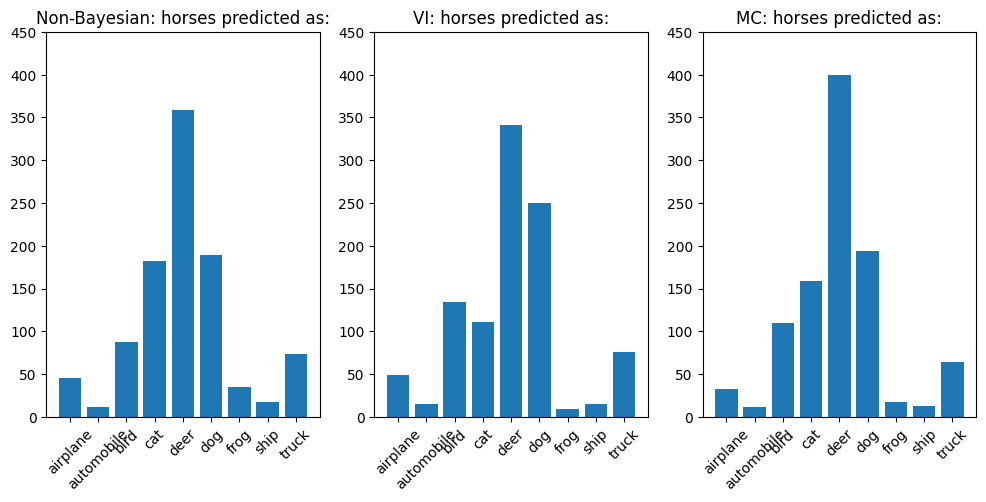

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.bar(np.unique(pred_labels[unknown_idx],return_counts=True)[0],np.unique(pred_labels[unknown_idx],return_counts=True)[1])
plt.xticks(rotation=45)
plt.title("Non-Bayesian: horses predicted as:")
plt.ylim([0,450])

plt.subplot(1,3,2)
plt.bar(np.unique(pred_labels_vi[unknown_idx],return_counts=True)[0],np.unique(pred_labels_vi[unknown_idx],return_counts=True)[1])
plt.xticks(rotation=45)
plt.title("VI: horses predicted as:")
plt.ylim([0,450])

plt.subplot(1,3,3)
plt.bar(np.unique(pred_labels_mc[unknown_idx],return_counts=True)[0],np.unique(pred_labels_mc[unknown_idx],return_counts=True)[1])
plt.xticks(rotation=45)
plt.title("MC: horses predicted as:")
plt.ylim([0,450])

plt.show()

### Comparación entre clases conocida y clase desconocida

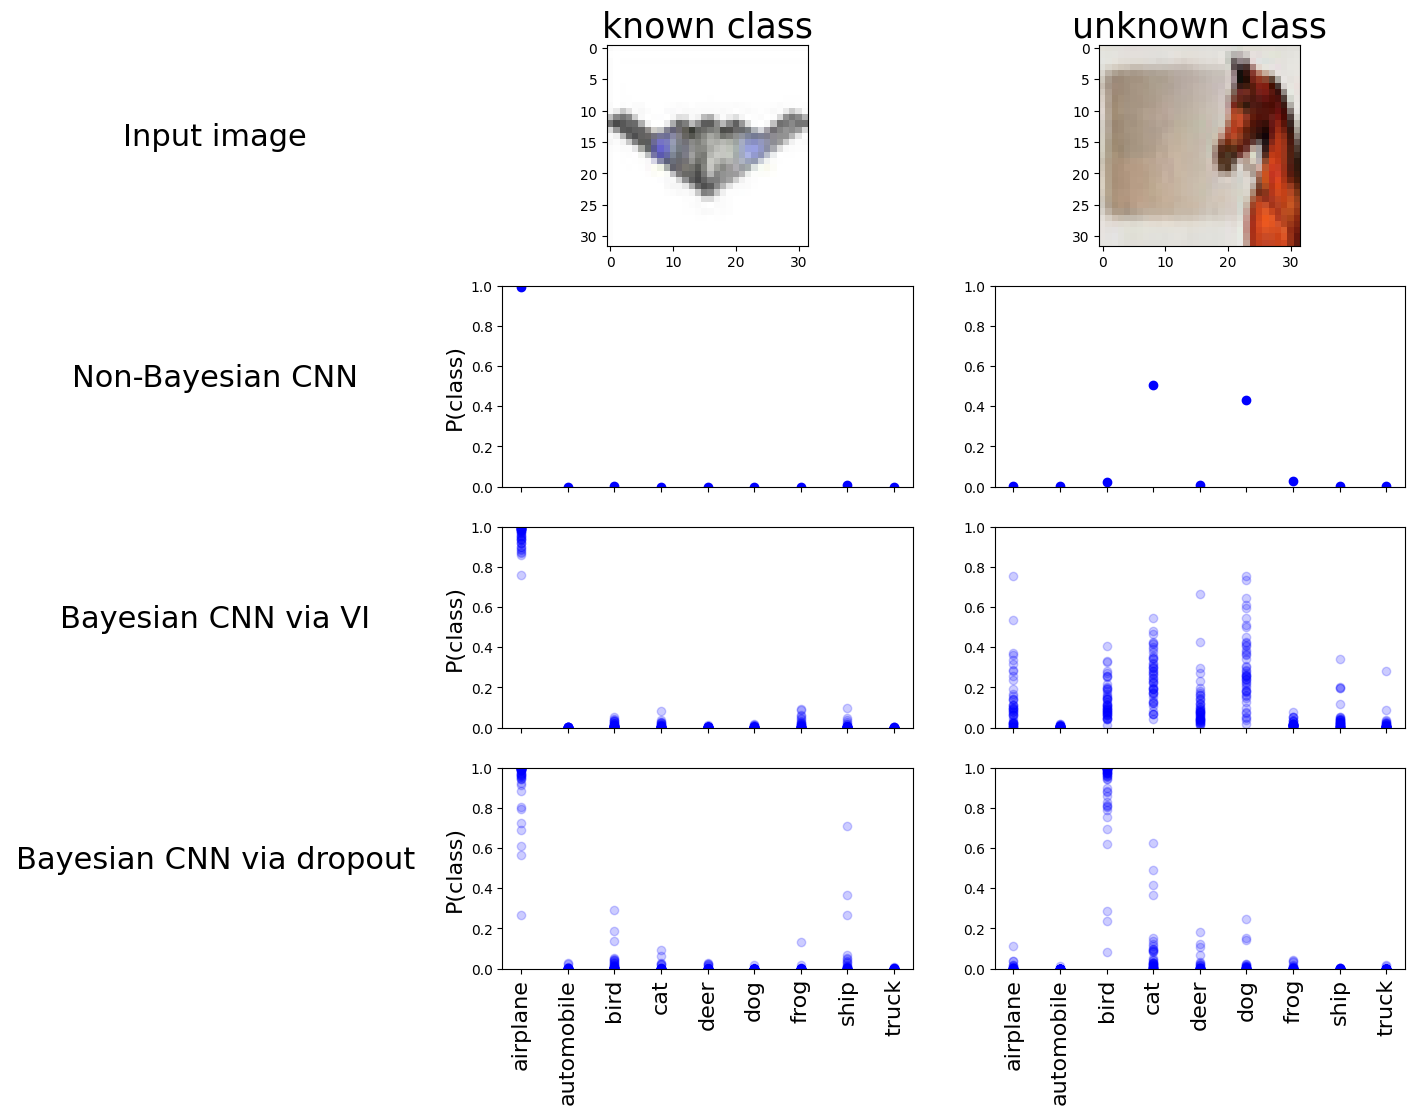

In [29]:
x_test_known = x_test[known_idx]
y_test_known = y_test[known_idx]

x_test_unknown = x_test[unknown_idx]
y_test_unknown = y_test[unknown_idx]

np.random.seed(7681)
random_sample_known=np.random.choice(range(0,len(x_test_known)),1)
np.random.seed(2384)
random_sample_unknown=np.random.choice(range(0,len(x_test_unknown)),1)

plt.figure(figsize=(18,12))
plt.subplot(4,3,1)
plt.axis('off')
plt.text(0.5,0.5, "Input image",fontsize=22,horizontalalignment='center')
plt.subplot(4,3,2)
plt.imshow(np.squeeze(np.array(((((x_test_known[random_sample_known])/2)+0.5)*255),dtype="uint8")))
plt.title("known class",fontsize=25)
plt.subplot(4,3,3)
plt.imshow(np.squeeze(np.array(((((x_test_unknown[random_sample_unknown])/2)+0.5)*255),dtype="uint8")))
plt.title("unknown class",fontsize=25)

plt.subplot(4,3,4)
plt.axis('off')
plt.text(0.5,0.5, "Non-Bayesian CNN",fontsize=22,horizontalalignment='center')
plt.subplot(4,3,5)
plt.scatter(range(0,9),model.predict(x_test_known[random_sample_known]),c="blue")
plt.ylabel("P(class)",fontsize=16)
plt.xticks(range(0,9),labels=np.repeat(" ",9))
plt.ylim([0,1])
plt.subplot(4,3,6)
plt.scatter(range(0,9),model.predict(x_test_unknown[random_sample_unknown]),c="blue")
plt.xticks(range(0,9),labels=np.repeat(" ",9))
plt.ylim([0,1])

plt.subplot(4,3,7)
plt.axis('off')
plt.text(0.5,0.5, "Bayesian CNN via VI",fontsize=22,horizontalalignment='center')
plt.subplot(4,3,8)
for i in range(0,50):
  plt.scatter(range(0,9),model_vi.predict(x_test_known[random_sample_known]),c="blue",alpha=0.2)
plt.xticks(range(0,9),labels=np.repeat(" ",9))
plt.ylim([0,1])
plt.ylabel("P(class)",fontsize=16)
plt.subplot(4,3,9)
for i in range(0,50):
  plt.scatter(range(0,9),model_vi.predict(x_test_unknown[random_sample_unknown]),c="blue",alpha=0.2)
plt.xticks(range(0,9),labels=np.repeat(" ",9))
plt.ylim([0,1])

plt.subplot(4,3,10)
plt.axis('off')
plt.text(0.5,0.5, "Bayesian CNN via dropout",fontsize=22,horizontalalignment='center')
plt.subplot(4,3,11)
for i in range(0,50):
  plt.scatter(range(0,9),model_mc_pred([x_test_known[random_sample_known],1]),c="blue",alpha=0.2)
plt.xticks(range(0,9),labels=labels_no_horse,fontsize=16)
plt.xticks(rotation=90)
plt.ylim([0,1])
plt.ylabel("P(class)",fontsize=16)
plt.subplot(4,3,12)
for i in range(0,50):
  plt.scatter(range(0,9),model_mc_pred([x_test_unknown[random_sample_unknown],1]),c="blue",alpha=0.2)
plt.xticks(range(0,9),labels=labels_no_horse,fontsize=16)
plt.xticks(rotation=90)
plt.ylim([0,1])
plt.savefig("8.good2.pdf")
plt.show()

* Se observa que la imagen del avión fue clasificada correctamente en los tres tipos de redes.
* En el caso VI y MC Dropout se observa variación en los gráficos, lo que indica que la predicción es confiable
* Entre VI y MC Dropout se observa un poco de incertidumbre en MC Dropout, pero notar que asigna probabilidades a la clase pájaro (tiene sentido).

* La imagen del caballo claramente serán incorrectas en los tres tipos de redes.
* Y las redes con enfoque probabilístico pueden expresar la incertidumbre de la predicción
* MC Dropout nuevamente indica más variación

## Incertidumbre de la predicción de clases conocidas por la red, y la clase desconocida

In [30]:
# Función para graficar distribuciones de las medidas de icertidumbre
def plot_hists(dist, title, xlabel, xlim=None):
    plt.hist(dist[unknown_idx],bins=30, density=True,alpha = 0.7)
    plt.hist(dist[known_idx],bins=30,  density=True,alpha = 0.7)
    plt.title(title)
    plt.legend(['unknown','known'])
    plt.xlabel(xlabel)
    if xlim != None:
        plt.xlim(xlim)

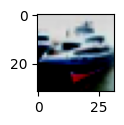

[8]


In [55]:
plt.figure(figsize=(1,1))
plt.imshow(x_test[1])
plt.show()
print(y_test[1])

In [62]:
preds[0].shape

(50, 9)

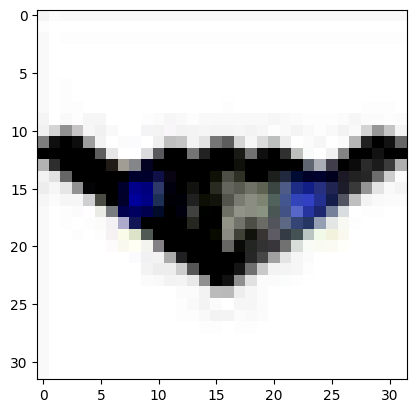

In [47]:



for i in tqdm(range(0,len(x_test))):
  multi_img=np.tile(x_test[i],(50,1,1,1))
  preds=model_mc_pred([multi_img,1])
  pred_mc[i]= np.mean(preds,axis=1)
  pred_max_p_mc[i]=np.argmax(np.mean(preds,axis=1))#mean over n runs of every proba class
  # varianza total
  pred_std_mc[i]= np.sqrt(np.sum(np.var(preds, axis=1)))

  #entropia
  entropy_mc[i] = -np.sum( pred_mc[i] * np.log2(pred_mc[i] + 1E-14)) #Numerical Stability
pred_labels_mc=np.array([labels_no_horse[np.argmax(pred_mc[i])] for i in range(0,len(pred_mc))])
pred_mc_mean_max_p=np.array([pred_mc[i][np.argmax(pred_mc[i])] for i in range(0,len(pred_mc))])

# nll
nll_mc=-np.log(pred_mc_mean_max_p)


In [39]:
print(nll_.shape, entropy.shape, nll_vi.shape, pred_std_vi.shape, entropy_vi.shape, nll_mc.shape, pred_std_mc.shape, entropy_mc.shape)

(10000,) (10000,) (10000,) (10000,) (10000,) (10000,) (10000,) (10000,)


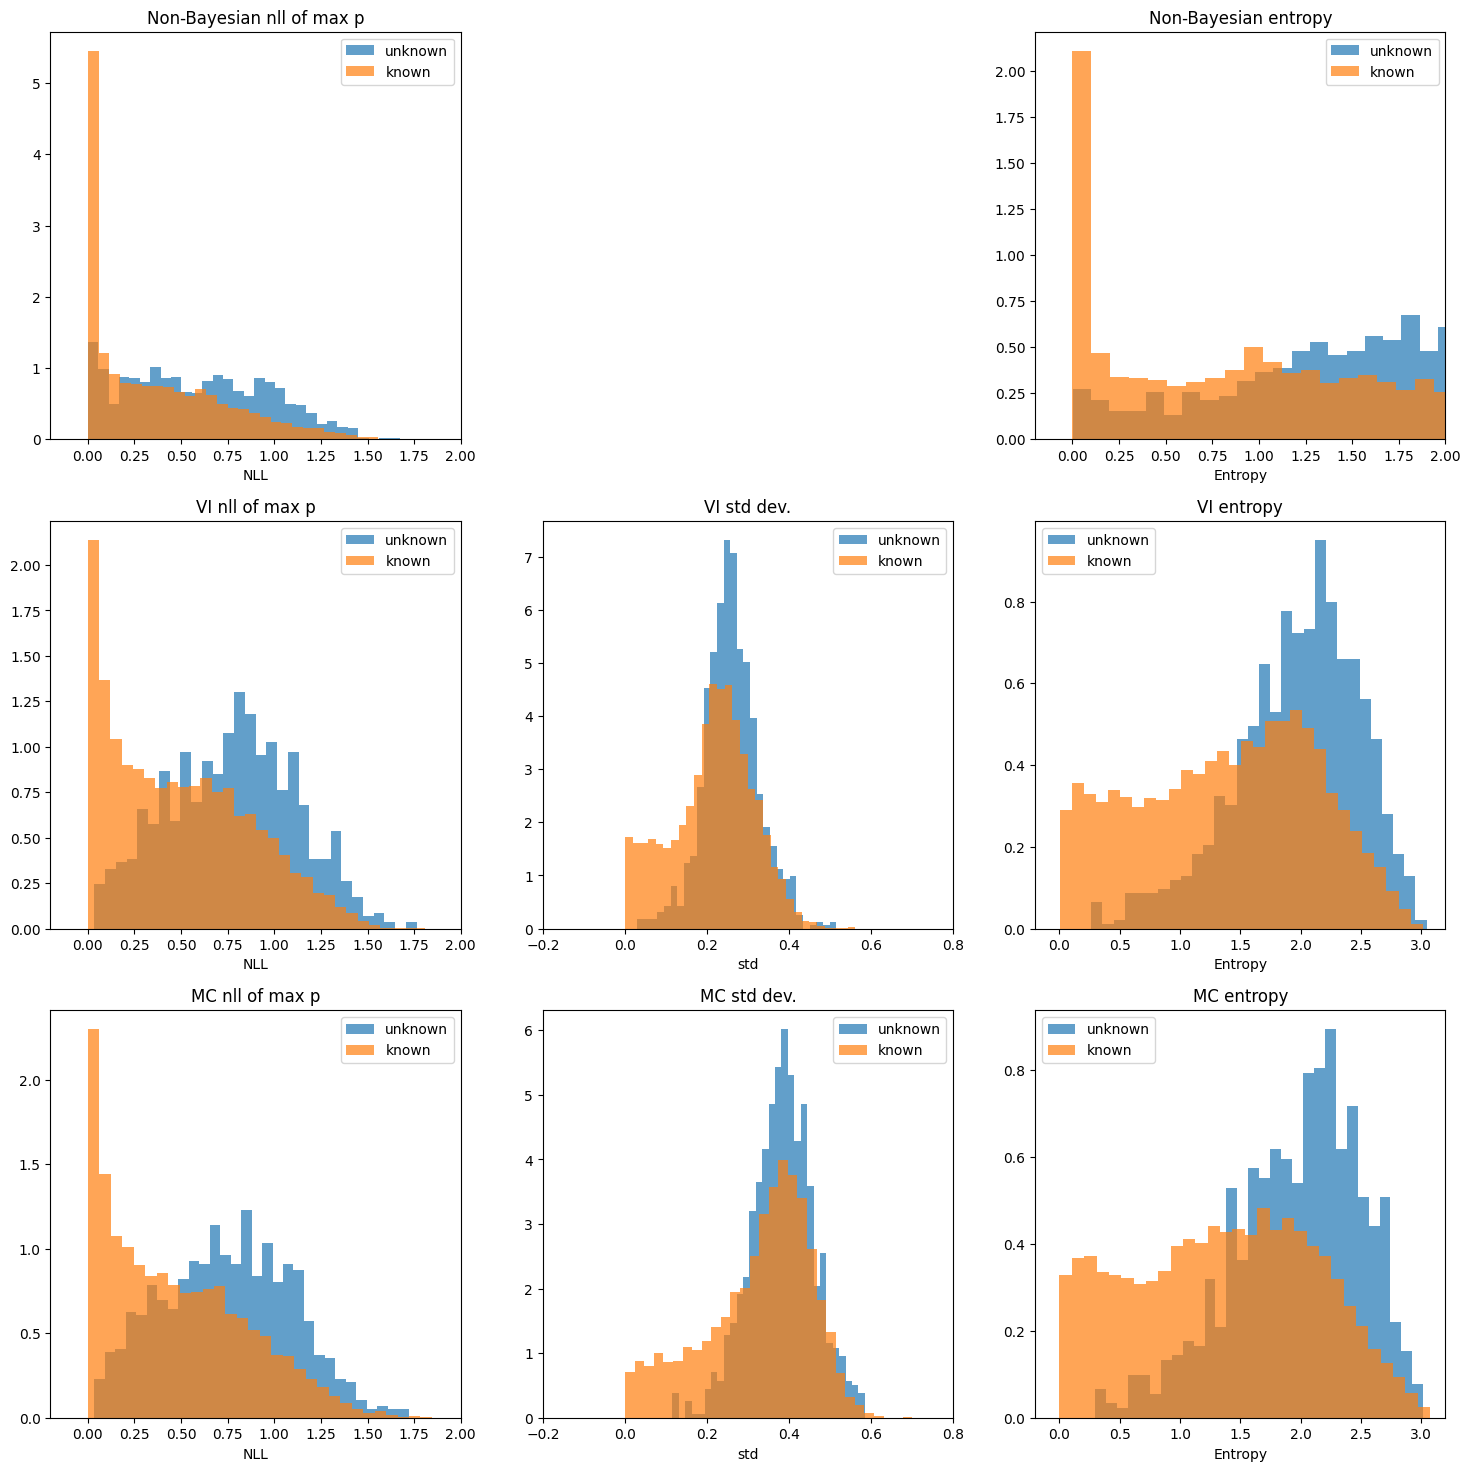

In [31]:
plt.figure(figsize=(18,18))

# Non-Bayesian
plt.subplot(3,3,1)
plot_hists(nll_, "Non-Bayesian nll of max p", "NLL", [-0.2,2])
plt.subplot(3,3,2)
plt.axis("off")
plt.subplot(3,3,3)
plot_hists(entropy, "Non-Bayesian entropy", "Entropy", [-0.2,2])

# VI
plt.subplot(3,3,4)
plot_hists(nll_vi, "VI nll of max p", "NLL", [-0.2,2])
plt.subplot(3,3,5)
plot_hists(pred_std_vi, "VI std dev.", "std", [-0.2,0.8])
plt.subplot(3,3,6)
plot_hists(entropy_vi, "VI entropy", "Entropy", [-0.2,3.2])

# MC Methods
plt.subplot(3,3,7)
plot_hists(nll_mc, "MC nll of max p", "NLL", [-0.2,2])
plt.subplot(3,3,8)
plot_hists(pred_std_mc, "MC std dev.", "std", [-0.2,0.8])
plt.subplot(3,3,9)
plot_hists(entropy_mc, "MC entropy", "Entropy", [-0.2,3.2])
